# Phase 3: Exploratory Data Analysis (EDA)

**Project**: Student Stress Risk Prediction with Explainable AI  
**Lead**: Exploratory Data Analysis Lead & Methodological Gatekeeper

## Objectives
- Understand dataset structure and quality.
- Analyze the distribution of `Stress_Level` (Target).
- Explore relationships between lifestyle features and stress risk.
- Formulate modeling implications for Module A.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set styling
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 8)

# Ensure output directory exists
os.makedirs('../outputs/eda', exist_ok=True)

## 1. Load Dataset

In [17]:
df = pd.read_csv('../data/raw.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (2000, 8)


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


## 2. Dataset Overview & Quality Check

In [18]:
print("--- Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Feature Types ---")
print(df.dtypes)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB

--- Missing Values ---
Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day     

## 3. Target Analysis: `Stress_Level`

Counts:
 Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64

Percentages:
 Stress_Level
High        51.45
Moderate    33.70
Low         14.85
Name: proportion, dtype: float64


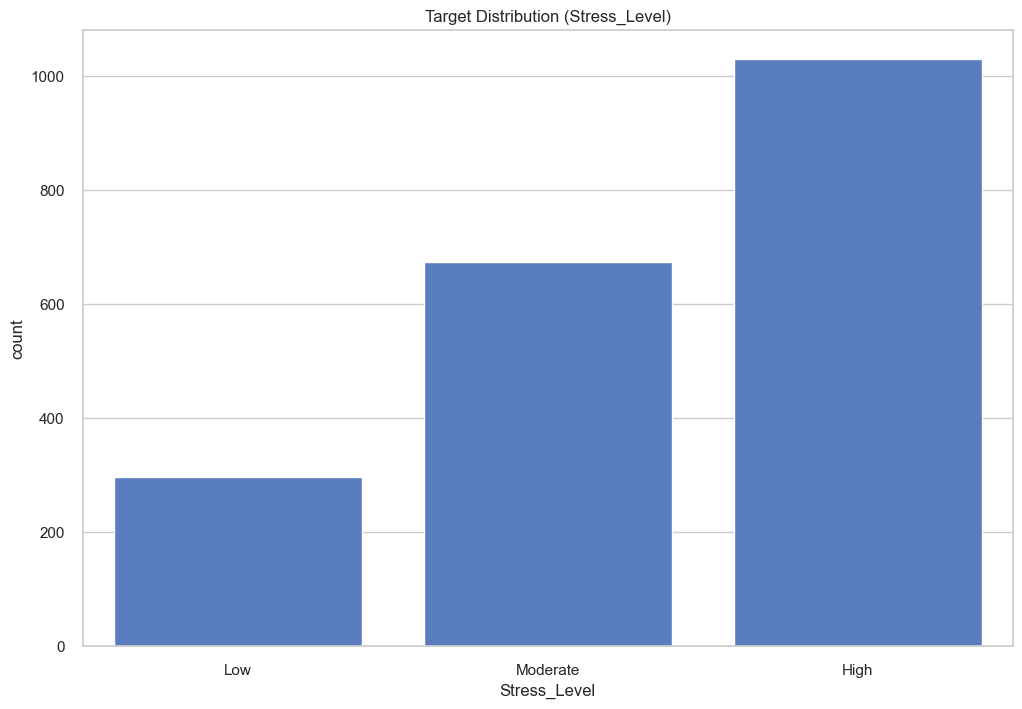

In [19]:
stress_order = ['Low', 'Moderate', 'High']
target_counts = df['Stress_Level'].value_counts()
target_perc = df['Stress_Level'].value_counts(normalize=True) * 100

print("Counts:\n", target_counts)
print("\nPercentages:\n", target_perc)

sns.countplot(x='Stress_Level', data=df, order=stress_order)
plt.title('Target Distribution (Stress_Level)')
plt.show()

## 4. Univariate Feature Analysis
Analyzing ranges, skewness, and potential anomalies.

,count,mean,std,min,25%,50%,75%,max
Study_Hours_Per_Day,2000.0,7.47580,1.423888,5.00,6.3,7.40,8.70,10.0
Extracurricular_Hours_Per_Day,2000.0,1.99010,1.155855,0.00,1.0,2.00,3.00,4.0
Sleep_Hours_Per_Day,2000.0,7.50125,1.460949,5.00,6.2,7.50,8.80,10.0
Social_Hours_Per_Day,2000.0,2.70455,1.688514,0.00,1.2,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,2000.0,4.32830,2.514110,0.00,2.4,4.10,6.10,13.0
GPA,2000.0,3.11596,0.298674,2.24,2.9,3.11,3.33,4.0



Skewness:
 Study_Hours_Per_Day                0.034988
Extracurricular_Hours_Per_Day      0.001263
Sleep_Hours_Per_Day               -0.007096
Social_Hours_Per_Day               0.184222
Physical_Activity_Hours_Per_Day    0.399239
GPA                                0.027516
dtype: float64


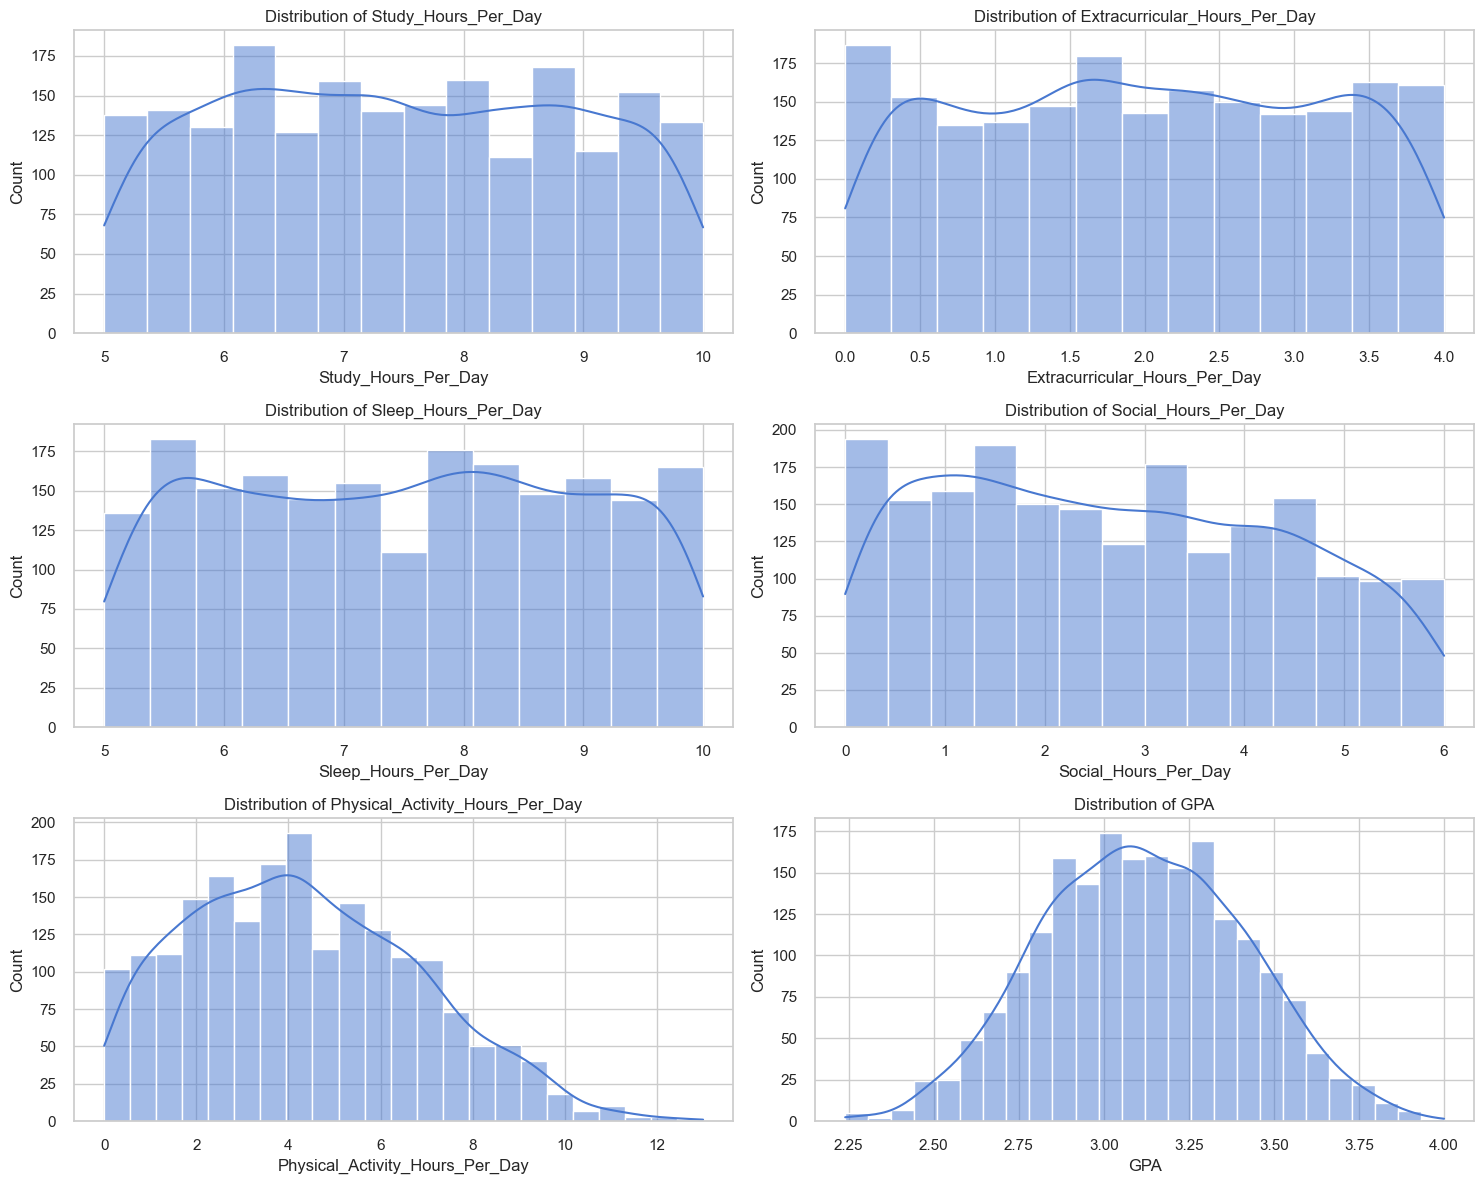

In [20]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != 'Student_ID']

display(df[num_cols].describe().T)
print("\nSkewness:\n", df[num_cols].skew())

# Visualize distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## 5. Bivariate Analysis
Exploring relationships between features and the target stress level.

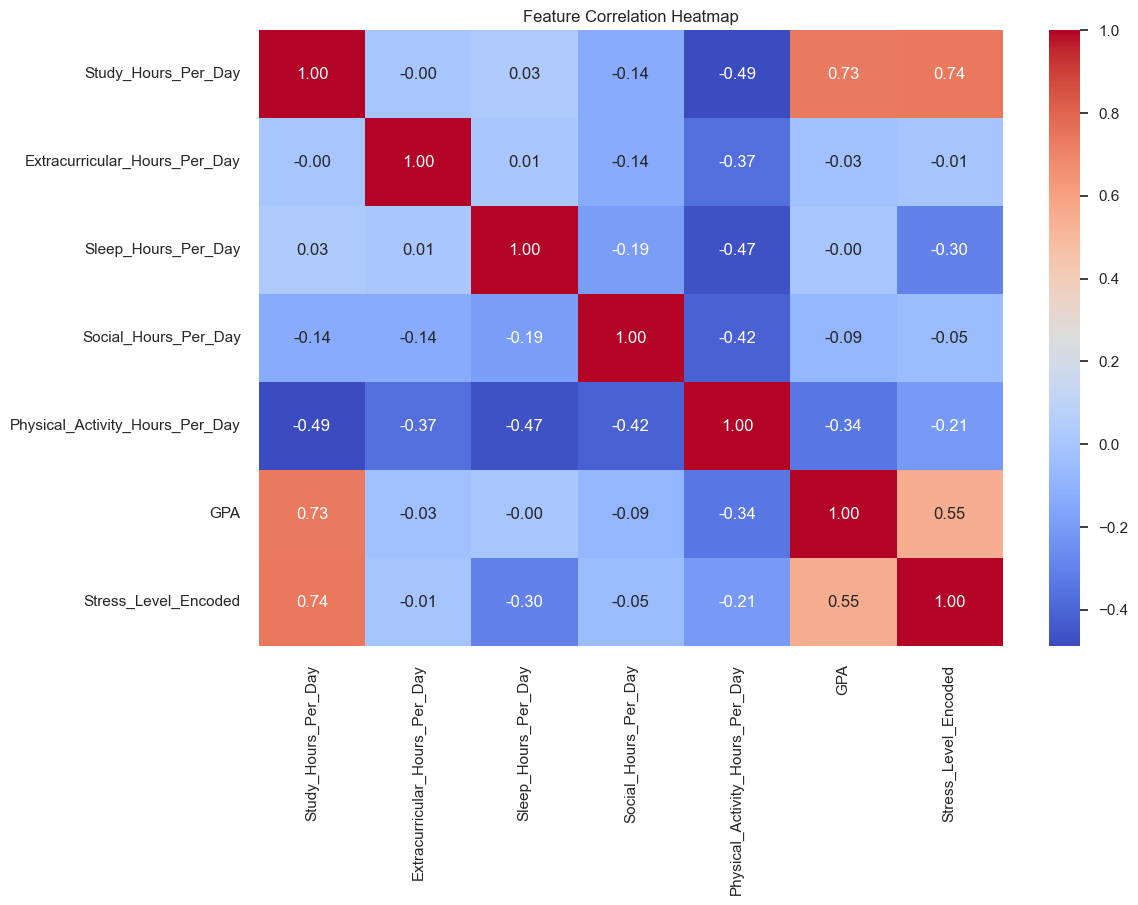

Correlation with Stress Level:
Stress_Level_Encoded               1.000000
Study_Hours_Per_Day                0.738843
GPA                                0.550395
Extracurricular_Hours_Per_Day     -0.006099
Social_Hours_Per_Day              -0.054702
Physical_Activity_Hours_Per_Day   -0.205207
Sleep_Hours_Per_Day               -0.298917
Name: Stress_Level_Encoded, dtype: float64


In [21]:
# Encode target for correlation analysis
df['Stress_Level_Encoded'] = df['Stress_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Correlation Matrix
corr_matrix = df[num_cols + ['Stress_Level_Encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

print("Correlation with Stress Level:")
print(corr_matrix['Stress_Level_Encoded'].sort_values(ascending=False))

### Boxplots: Features vs Stress Level

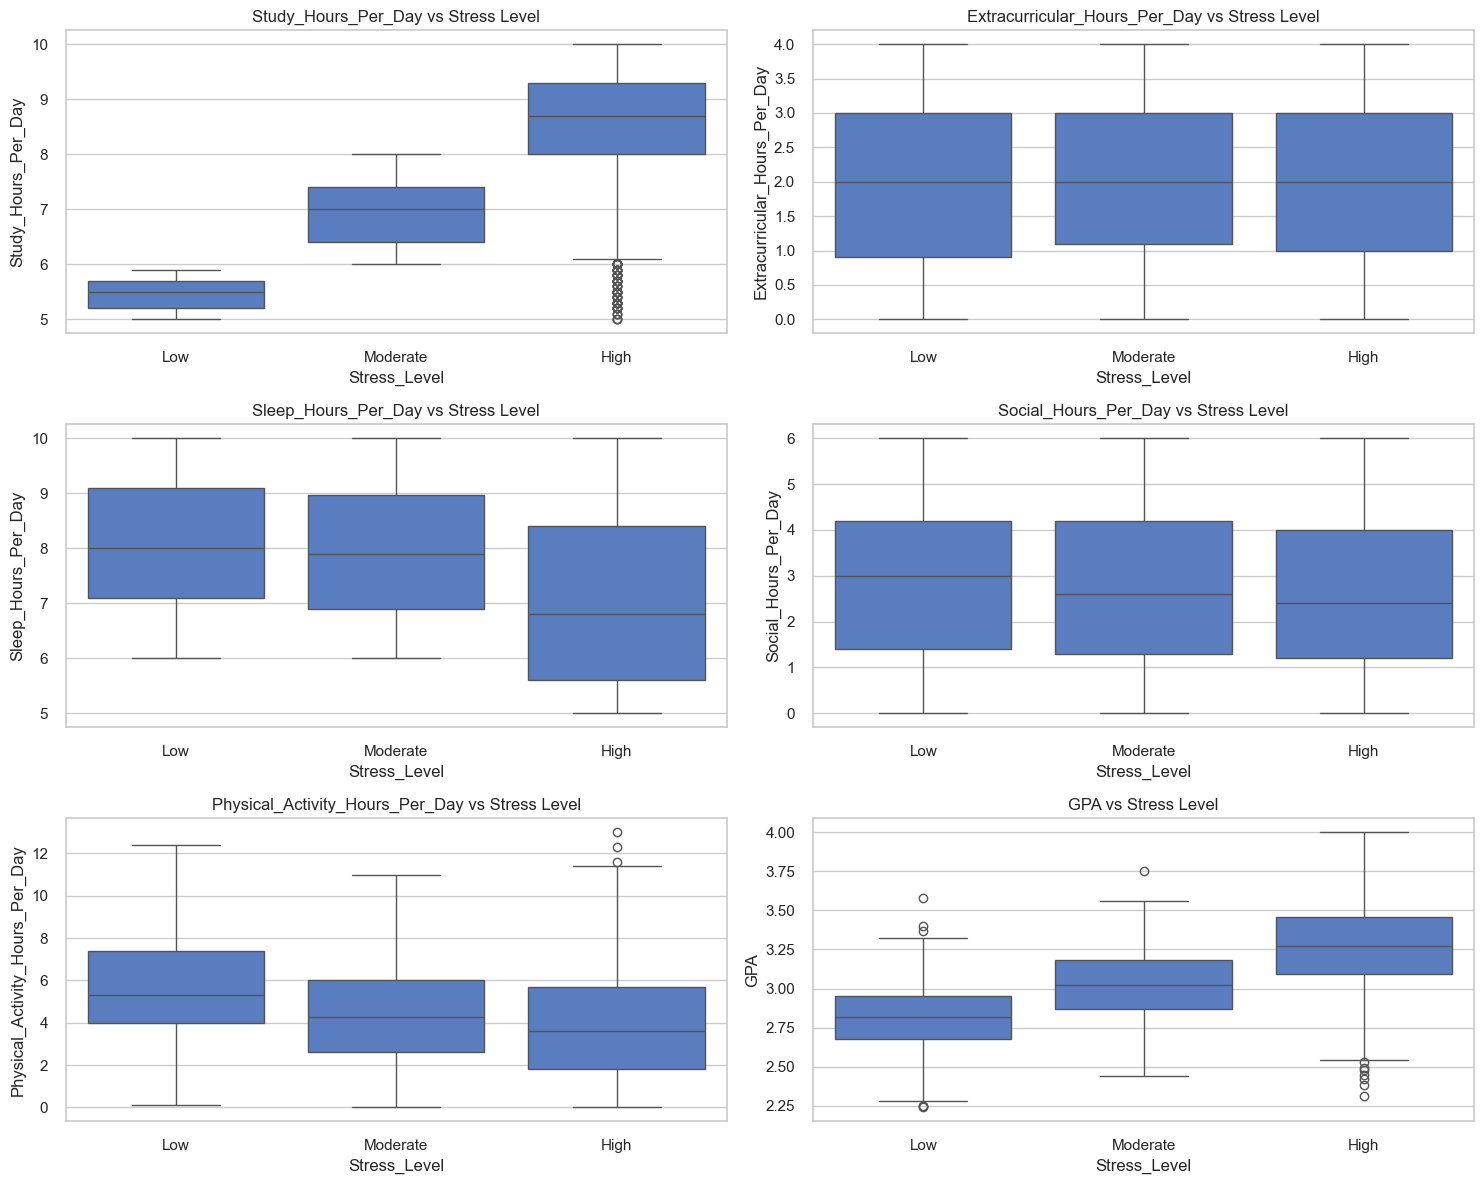

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x='Stress_Level', y=col, data=df, order=stress_order, ax=axes[i])
    axes[i].set_title(f'{col} vs Stress Level')

plt.tight_layout()
plt.show()

## 6. Feature Redundancy (Collinearity)

In [23]:
high_corr = []
feat_corr = df[num_cols].corr()
for i in range(len(feat_corr.columns)):
    for j in range(i):
        if abs(feat_corr.iloc[i, j]) > 0.7:
            high_corr.append((feat_corr.columns[i], feat_corr.columns[j], feat_corr.iloc[i, j]))

print("High Correlation Pairs (>0.7):")
for f1, f2, val in high_corr:
    print(f"{f1} - {f2}: {val:.2f}")

High Correlation Pairs (>0.7):
GPA - Study_Hours_Per_Day: 0.73


## 7. EDA Conclusions
- **Target Imbalance**: Classes are imbalanced (High: 51%, Moderate: 34%, Low: 15%).
- **Strong Predictors**: `Study_Hours_Per_Day` (0.74) and `GPA` (0.55) are the main drivers of stress.
- **Collinearity**: High redundancy between `GPA` and `Study_Hours` (0.73).
- **Data Artifacts**: Physical Activity has an outlier (13h) that needs investigation during preprocessing.